# Figures pour le papier

## Spectrogrammes

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from echantillonnages import getSamplings
from constructionPsi import getSound
import os
from affichageDonnees import displaySpectrogram

def displaySamplingsSpectrogram(nbSamples, samplingNames, samplingFunctions, height, width, descriptorName, J, Q, pertinenceFunction, root, cmap):

    # Display spectrograms

    nbRows = len(samplingNames)
    nbCols = nbSamples

    fig, axs = plt.subplots(nrows = nbRows, ncols = nbCols, figsize = (nbCols * width, nbRows * height), sharex = True, sharey = True)

    for i, samplingFunction in enumerate(samplingFunctions):

        samples, _ = samplingFunction(nbSamples, root = root, descriptorName = descriptorName, J = J, Q = Q, pertinenceFunction = pertinenceFunction)

        for j in range(nbCols):

            sound, fs = getSound(os.path.join(root, samples[j]), 5)

            displaySpectrogram(sound, fs, "", axs[i, j], xlabel = "", ylabel = "", cmap = cmap)
            axs[i, j].set_ylim([0, 10000])


    # Titles and labels

    grid = plt.GridSpec(nbRows, nbCols)
    for k in range(nbRows):

        row = fig.add_subplot(grid[k, ::])
        row.set_title(samplingNames[k], fontweight='semibold')
        row.set_frame_on(False)
        row.axis('off')

    for k in range(nbRows):
        axs[k, 0].set_ylabel("Fréquences [Hz]")

    for k in range(nbCols):
        axs[-1, k].set_xlabel("Temps [s]")
    
    fig.tight_layout()
    plt.show()

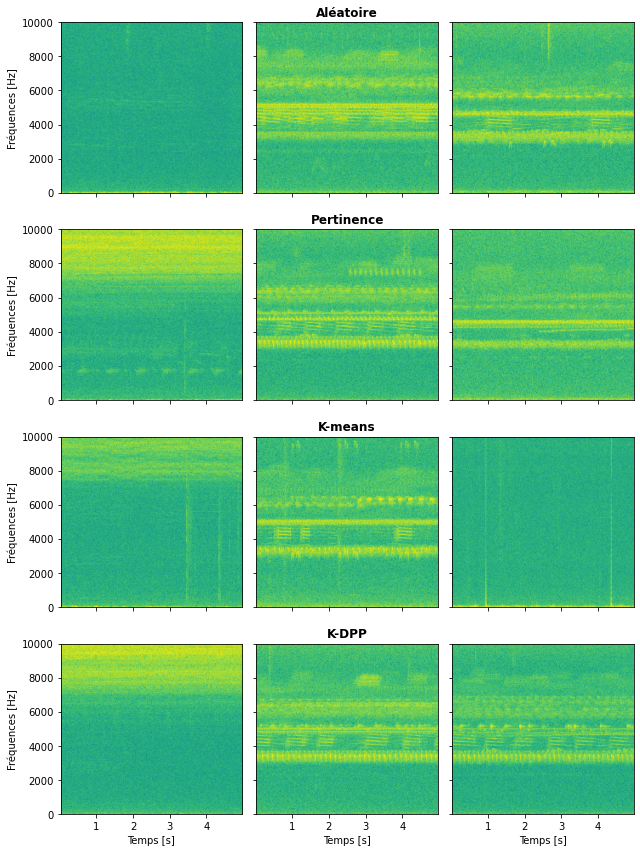

In [1]:
from affichageDonnees import displaySamplingsSpectrogram
from echantillonnages import sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp

nbSamples = 3
samplingNames = ["Aléatoire", "Pertinence", "K-means", "K-DPP"]
samplingFunctions = [sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp]
height = 3
width = 3
descriptorName = 'scalogramStat4'
J = 12
Q = 3
pertinenceFunction = 'inverse'
root = './soundDatabase'
cmap = 'viridis'


displaySamplingsSpectrogram(nbSamples, samplingNames, samplingFunctions, height, width, descriptorName, J, Q, pertinenceFunction, root, cmap)